In [1]:
import os
import sys
import numpy as np
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

sys.path.insert(0, '/home/young/workspace/dna2vec')
from dna2vec.multi_k_model import MultiKModel
sys.path.pop(0)

'/home/young/workspace/dna2vec'

In [2]:
modelPath = '~/workspace/dna2vec/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v'
mk_model = MultiKModel(modelPath)

In [3]:
SEQLENGTH = 8

with open('/home/dataset/genome/hg38/preprocessed/chrM.fa', 'r') as fs:
    
    sequence = fs.read().upper()

In [4]:
parsed = list()
vecs = list()
idxs = list()

for idx in range(0, len(sequence) - SEQLENGTH):
    
    if not 'N' in sequence[idx:idx + SEQLENGTH]:
    
        idxs.append(idx)
        vecs.append(mk_model.vector(sequence[idx:idx + SEQLENGTH]))

vecs = np.array(vecs)
idxs = np.array(idxs)

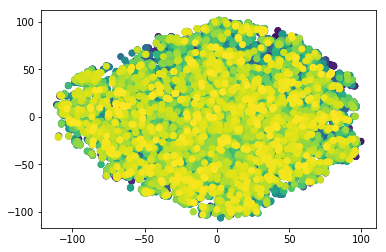

In [5]:
embedding_tsne = TSNE(n_components = 2).fit_transform(vecs)
plt.scatter(embedding_tsne[:,0], embedding_tsne[:,1], c = idxs)
plt.show()

/home/young/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


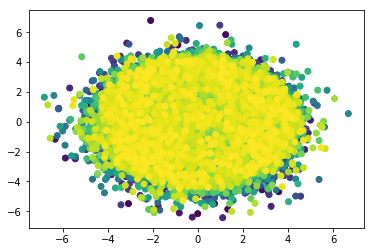

In [6]:
embedding_mds = MDS(n_components = 2, n_jobs = 40).fit_transform(vecs)
plt.scatter(embedding_mds[:,0], embedding_mds[:,1], c = idxs)
plt.show()

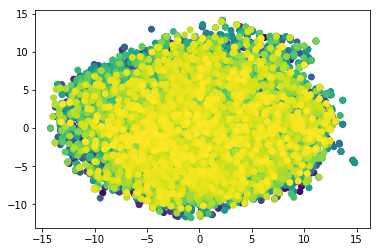

In [7]:
embedding_isomap = Isomap(n_neighbors = 5, n_components = 2, n_jobs = 40).fit_transform(vecs)
plt.scatter(embedding_isomap[:,0], embedding_isomap[:,1], c = idxs)
plt.show()

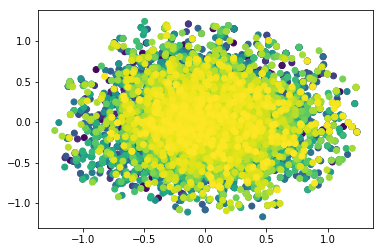

In [8]:
embedding_spectral = SpectralEmbedding(n_components = 2, n_jobs = 40).fit_transform(vecs)
plt.scatter(embedding_spectral[:,0], embedding_spectral[:,1], c = idxs)
plt.show()